<a href="https://colab.research.google.com/github/DarkStoner-Blaze/CodeEvo-Solutions-AI/blob/main/Affine_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# prompt: load tenor flow ,  keras , numpy libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np


In [14]:
# prompt: load affine mnist dataset

(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

# Reshape the data to 2D so we can use it with our affine transformation
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

# Scale the data to [0, 1]
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Create the affine transformation matrix
W = np.random.randn(784, 784)

# Apply the affine transformation to the training and testing data
X_train_transformed = np.dot(X_train, W)
X_test_transformed = np.dot(X_test, W)


In [15]:
from tensorflow.keras.utils import to_categorical

# Normalize the images to [0, 1] range
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Reshape the images if necessary (e.g., if they are not in 28x28 format)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build the model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')


Epoch 1/10
469/469 [==============================] - 48s 100ms/step - loss: 1.3511 - accuracy: 0.5348 - val_loss: 0.4550 - val_accuracy: 0.8674
Epoch 2/10
469/469 [==============================] - 46s 99ms/step - loss: 0.5504 - accuracy: 0.8291 - val_loss: 0.2831 - val_accuracy: 0.9151
Epoch 3/10
469/469 [==============================] - 47s 101ms/step - loss: 0.4244 - accuracy: 0.8713 - val_loss: 0.2106 - val_accuracy: 0.9389
Epoch 4/10
469/469 [==============================] - 49s 105ms/step - loss: 0.3509 - accuracy: 0.8931 - val_loss: 0.1689 - val_accuracy: 0.9501
Epoch 5/10
469/469 [==============================] - 46s 99ms/step - loss: 0.3036 - accuracy: 0.9085 - val_loss: 0.1412 - val_accuracy: 0.9571
Epoch 6/10
469/469 [==============================] - 47s 100ms/step - loss: 0.2633 - accuracy: 0.9205 - val_loss: 0.1251 - val_accuracy: 0.9609
Epoch 7/10
469/469 [==============================] - 46s 99ms/step - loss: 0.2336 - accuracy: 0.9295 - val_loss: 0.1124 - val_accur

313/313 [==============================] - 4s 13ms/step
Test MSE: 0.0030


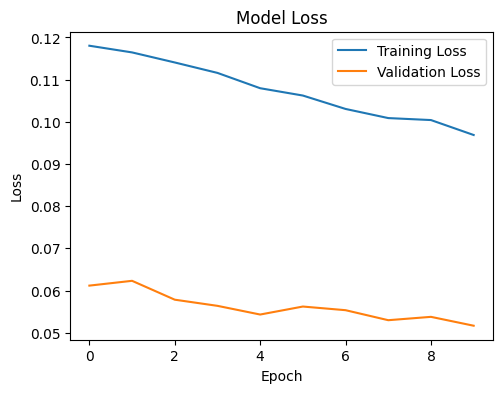

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming model and data have already been defined and trained as per previous steps

# Calculate predictions
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse:.4f}')

# Plotting loss function charts
history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_data=(X_test, y_test), verbose=0)

# Plotting loss function charts
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')


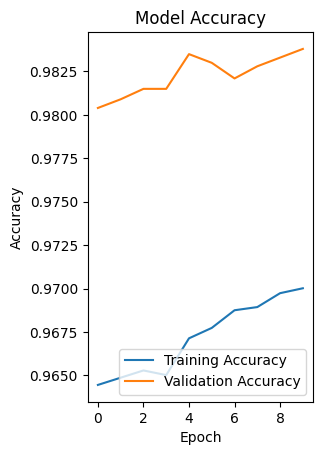

In [20]:
# Summarize history for accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [21]:
# Plotting some images with their true labels
def plot_images(images, labels, predictions=None, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].reshape(28, 28), cmap='gray')
        if predictions is None:
            plt.title(f"Label: {np.argmax(labels[i])}")
        else:
            plt.title(f"Label: {np.argmax(labels[i])}\nPred: {np.argmax(predictions[i])}")
        plt.axis('off')
    plt.show()

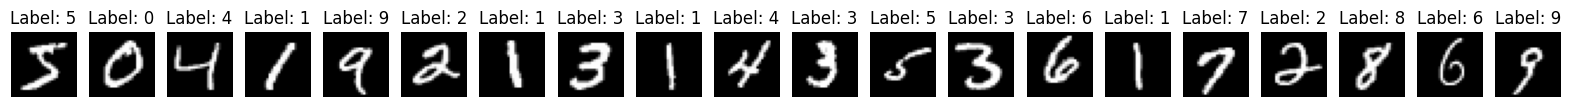

In [22]:
# Plot some training images
plot_images(X_train, y_train, num_images=20)

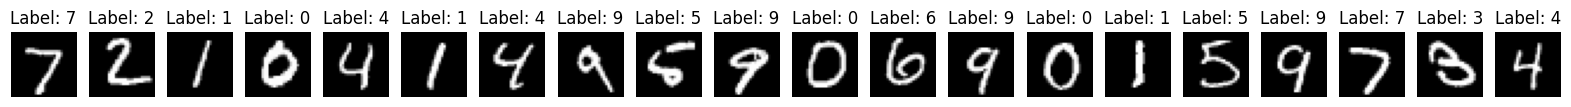

In [23]:
# Plot some training images
plot_images(X_test, y_test, num_images=20)

In [24]:
# @title
